In [2]:
!pip install langgraph langchain_groq langsmith langchain langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.8 MB/s eta 0:00:00


In [4]:
from google.colab import userdata
groq_api_key=userdata.get('Groq_api_key')

In [6]:
from langchain_groq import ChatGroq
llm = ChatGroq(groq_api_key=groq_api_key,
               model_name="qwen-qwq-32b")

In [8]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph,START,END

In [9]:
class state(TypedDict):
  message:Annotated[list, add_messages]

graph_builder=StateGraph(state)

In [11]:
graph_builder

In [10]:
def chatbot(state:state):
  return {"message":llm.invoke(state['message'])}

In [13]:
graph_builder.add_node("chatbot",chatbot)

In [14]:
graph_builder

In [15]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

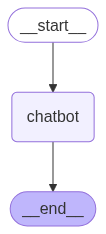

In [17]:
graph_builder.compile()

In [18]:
graph=graph_builder.compile()

In [24]:
while True:
  user_input=input("user :")
  if user_input.lower() in ['quit','q']:
    print("Good bye ..")
    break
  for event in graph.stream({'message':('user', user_input)}):
    print(event.values())
    for value in event.values():
      print(value['message'])
      print('Assisstant:',value['message'].content)

user :LAnggraph
dict_values([{'message': AIMessage(content='\n<think>\nOkay, the user mentioned "LAnggraph." I think they might be referring to LangGraph, which I know is related to LangChain. Let me confirm that first. LangChain is a framework for developing applications using LLMs. LangGraph, perhaps, is a tool within LangChain for visualizing the structure of the chains or the data flow? I should check the official documentation or look up recent updates to see if there\'s a specific tool called LangGraph.\n\nAlternatively, maybe it\'s a typo or a less commonly known term. Let me think of possibilities. Could it be a part of the LangChain library that handles graph-based data structures or workflows? Or maybe it\'s a tool for creating graphs of model interactions? I\'ve heard of tools like LLMs in a graph format for knowledge graphs, but I\'m not sure.\n\nWait, maybe LangGraph is a visualization tool for LangChain chains. The user might be asking how to use it or what it does. Since